In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
print("Datset (first 5 rows):\n",df.head())

Datset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [3]:
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [10]:
print(f"\nLinearEquation:Price={model.coef_[0]:.2f} * MedInc +{model.intercept_:.2f}")
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nName:{mae:.2f} $100k")
print(f"\nRMSE: {rmse:.2f} $100k")
print(f"R2: {r2:.2f}")


LinearEquation:Price=0.45 * MedInc +-37.02

Name:0.53 $100k

RMSE: 0.75 $100k
R2: 0.58


In [9]:
#REsiduals=actual-predicted
residuals=y_test-y_pred
#quick peak
print("\nFirst 5 residuals")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 residuals
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


In [ ]:
##Positive Residual:Model underpredicted
##Negative residual:Model overPredicted


**plot 1:Scatterplot of Residuals**

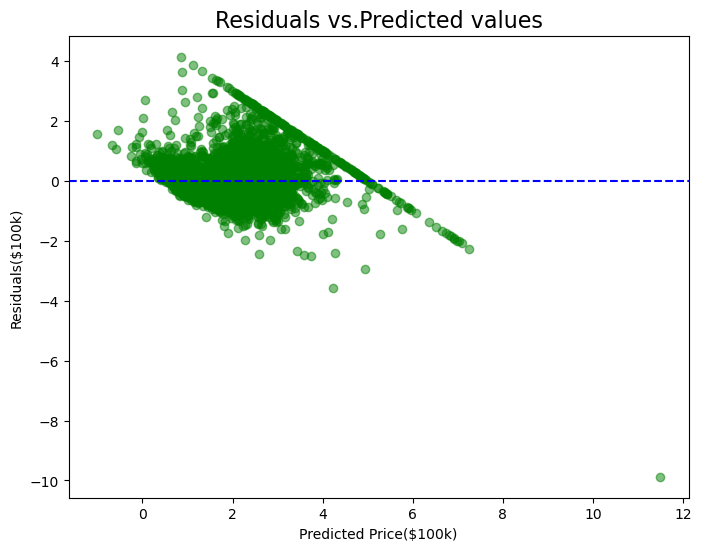

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residuals,color='green',alpha=0.5)
plt.axhline(y=0,color='blue',linestyle='--')
plt.title('Residuals vs.Predicted values',fontsize=16)
plt.xlabel('Predicted Price($100k)')
plt.ylabel('Residuals($100k)')
plt.show()

**plot 2:Histogram of Residuals**

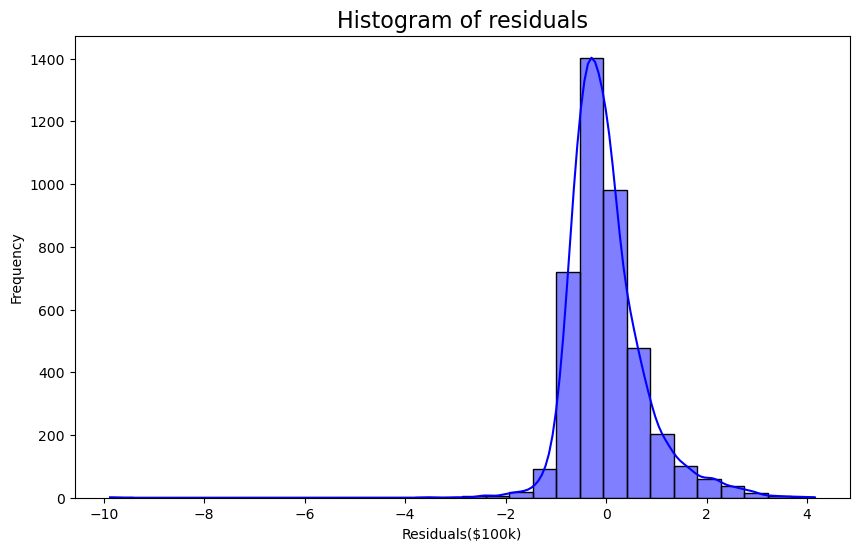

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of residuals',fontsize=16)
plt.xlabel('Residuals($100k)')
plt.ylabel('Frequency')
plt.show()

**Plot 3:Q-Q plot(used for normality Check)**

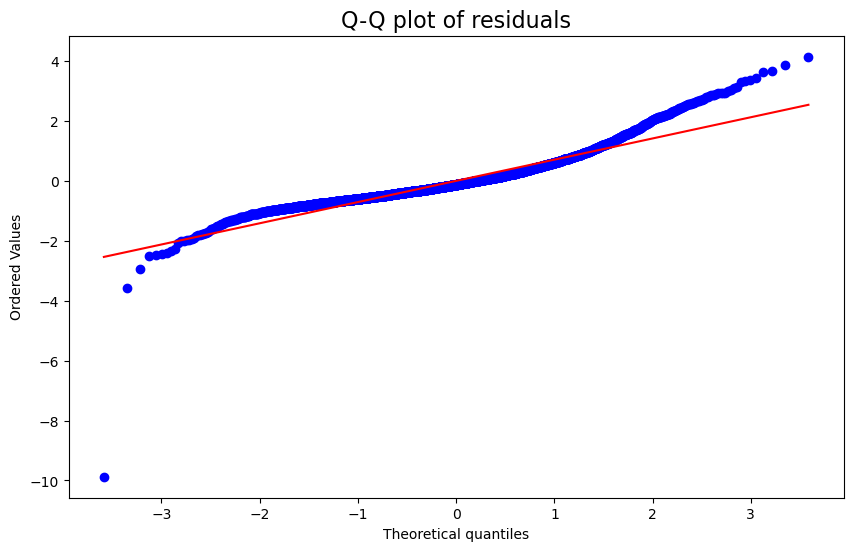

In [16]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title('Q-Q plot of residuals',fontsize=16)
plt.show()

*Good:Points follow redline
#Bad line:Big deviations
#Capping effect
By observing graphs we understood
Linearity:Scatterplot shows no strong curve-assumptions holds decently
constant varaince:slight fanning at higher prices-mild heteroscedasticity(variance grows)
    Normality:Histogram